<a href="https://colab.research.google.com/github/mounilgarg/AndroSensor/blob/main/YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone


fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5n - yolov5x6, custom

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-7-19 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
# Images
img = 'https://ultralytics.com/images/zidane.jpg'  # or file, Path, PIL, OpenCV, numpy, list

In [ ]:
# Inference
results = model(img)

In [ ]:
# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

image 1/1: 720x1280 2 persons, 2 ties
Speed: 400.9ms pre-process, 16.2ms inference, 1.6ms NMS per image at shape (1, 3, 384, 640)


In [ ]:
# upload own image
# !wget https://thumbs.dreamstime.com/b/business-people-meeting-discussion-working-office-concept-65007656.jpg

In [ ]:
'''detect.py runs inference on a variety of sources, 
downloading models automatically from the latest YOLOv5 release and saving results to runs/detect.'''

'''!python detect.py --source 0  # webcam
                          img.jpg  # image
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream'''

# !python detect.py --source ./business-people-meeting-discussion-working-office-concept-65007656.jpg      
# !python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images                  

"!python detect.py --source 0  # webcam\n                          img.jpg  # image\n                          vid.mp4  # video\n                          path/  # directory\n                          path/*.jpg  # glob\n                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube\n                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream"

In [ ]:
# training

# !python train.py --data coco.yaml --cfg yolov5s.yaml --weights '' --batch-size 64
                                      #  yolov5s                                64
                                      #  yolov5m                                40
                                      #  yolov5l                                24
                                      #  yolov5x                                16
                                      #  yolov5n                                128

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DCYjbUyC4XrWs2jSpSEx")
project = rf.workspace("droneyolo").project("dronev5")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to droneV5-1 in yolov5pytorch:: 100%|██████████| 2206/2206 [00:01<00:00, 1305.16it/s]


In [ ]:
import torch
print(torch.cuda.is_available())

True


In [ ]:
import os

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
# !python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt
!python train.py --img 416 --batch 16 --epochs 3 --data /content/yolov5/droneV5-1/data.yaml --weights yolov5s.pt
# !python tools/train.py --batch 32 --conf configs/yolov6s.py --epochs 100 --img-size 416 --data {dataset.location}/data.yaml --device 0

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/droneV5-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015,

In [ ]:
# Run YOLOv5s on data val
!python val.py --weights /content/yolov5/runs/train/exp/weights/best.pt --data /content/yolov5/droneV5-1/data.yaml --img 416 --iou 0.65 --half

val: data=/content/yolov5/droneV5-1/data.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.65, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '/content/yolov5/droneV5-1/valid/labels.cache' images and labels... 219 found, 0 missing, 0 empty, 0 corrupt: 100% 219/219 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 7/7 [00:05<00:00,  1.31it/s]
                 all        219        253      0.491      0.487      0.462      0.227
Speed: 0.1ms pre-process, 3.0ms inference, 1.8ms NMS per image at shape (32, 3,

In [ ]:
# infer with custom dataset images
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/droneV5-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/110 /content/yolov5/droneV5-1/test/images/foto00987_png.rf.805fc0e6ecde1d503e2ae4543b151163.jpg: 416x416 2 drones, Done. (0.010s)
image 2/110 /content/yolov5/droneV5-1/test/images/foto01277_png.rf.079eaca1ab7797b7b559934c8cc39b17.jpg: 416x416 2 drones, Done. (0.008s)
image 3/110 /content/yolov5/droneV5-1/test/images/foto01480_png.rf.

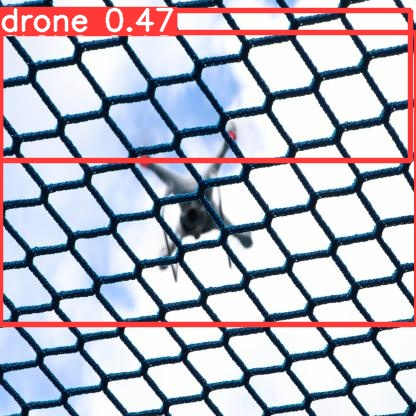

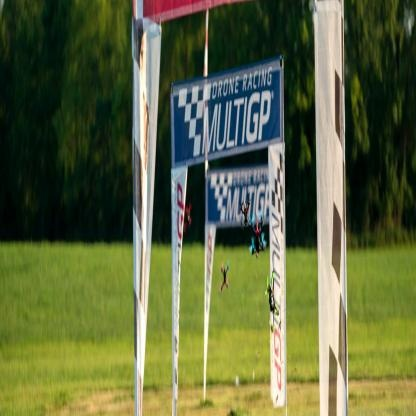

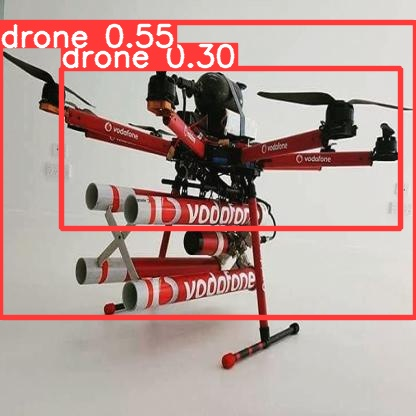

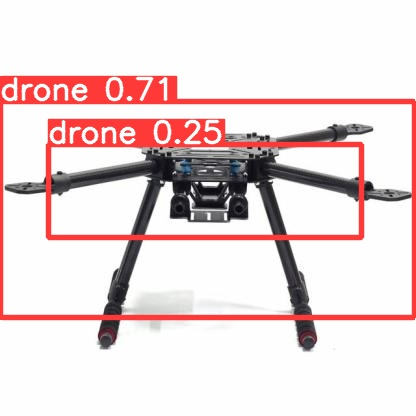

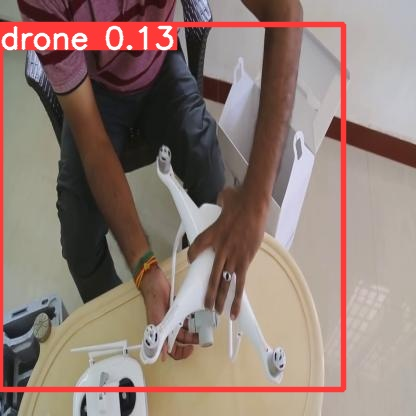

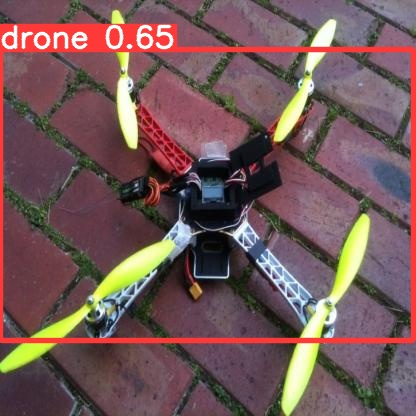

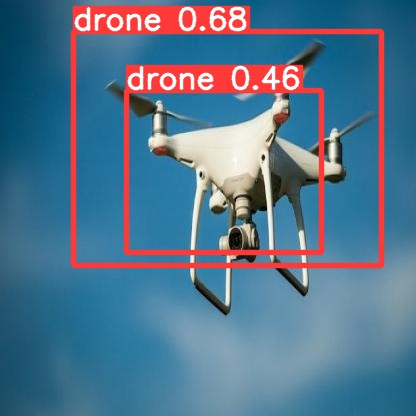

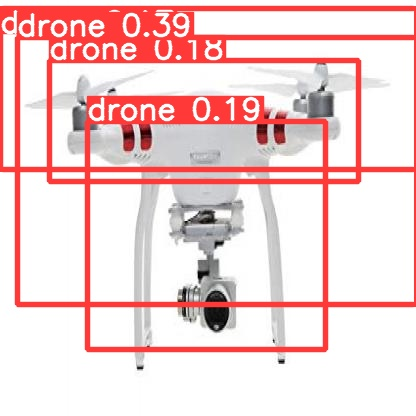

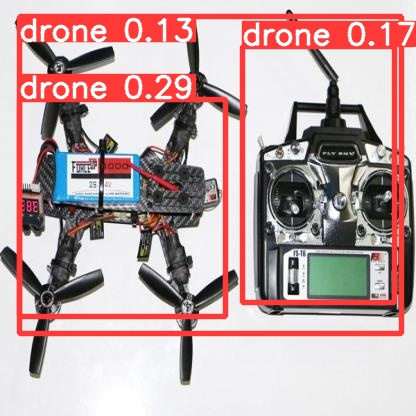

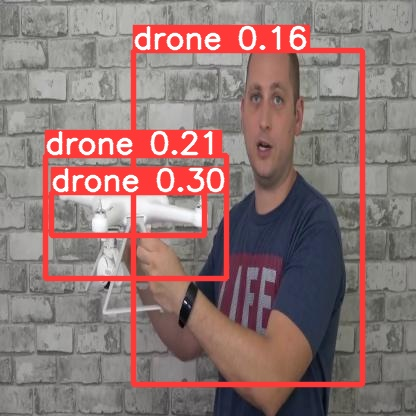

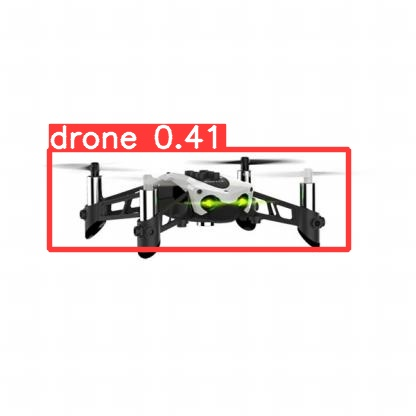

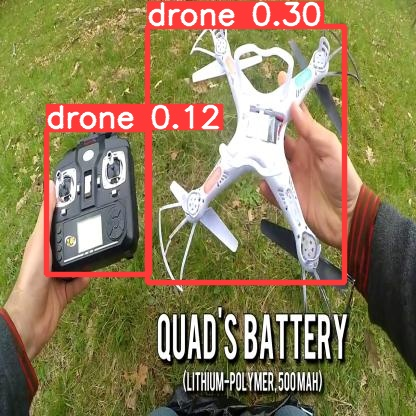

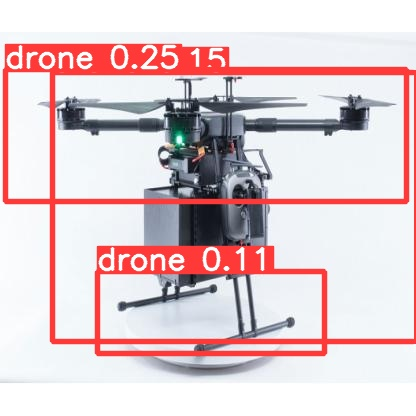

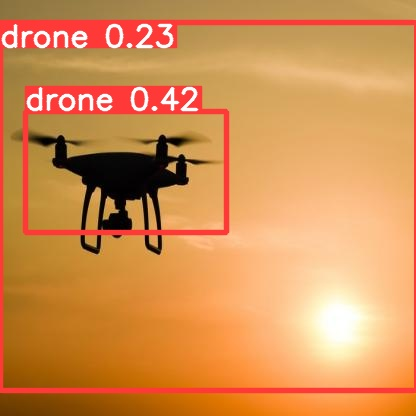

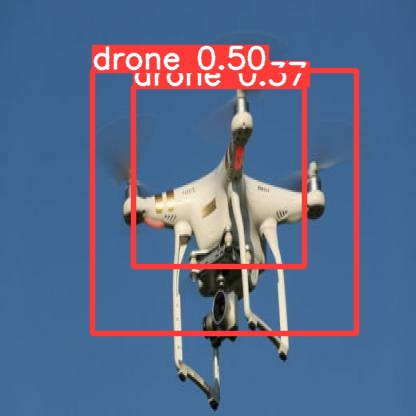

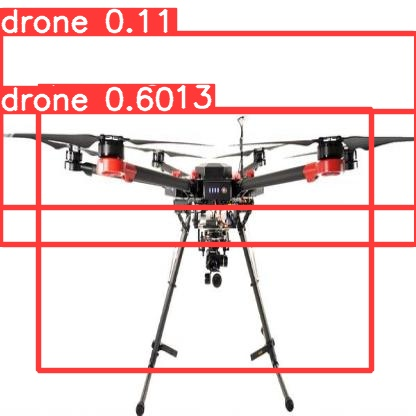

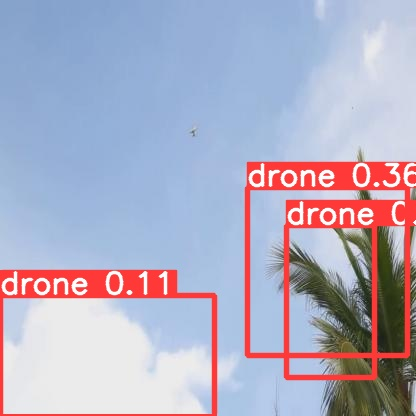

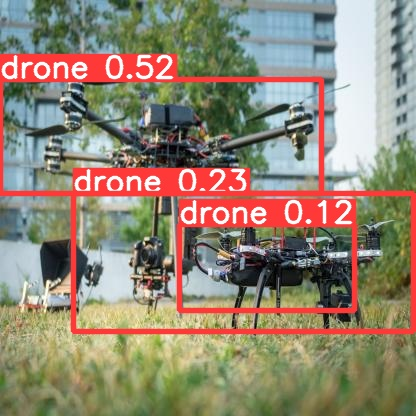

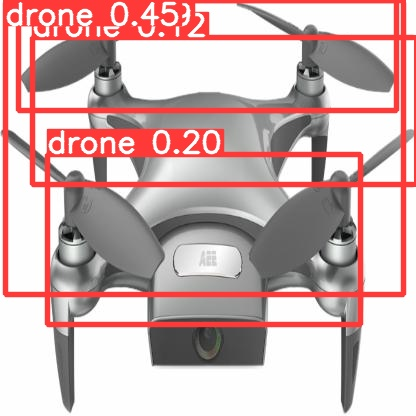

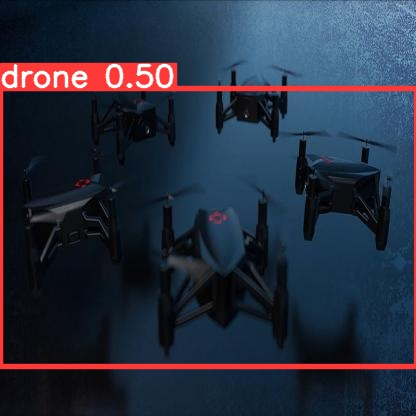

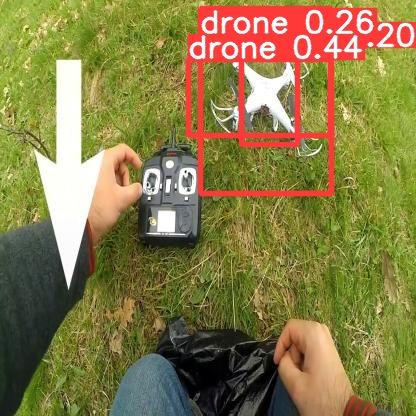

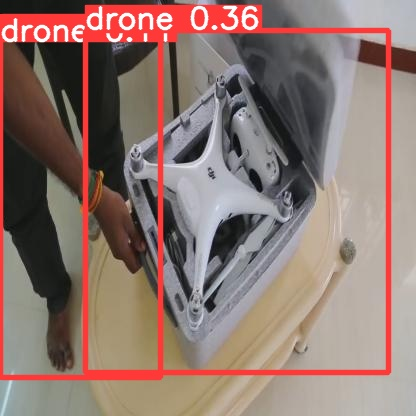

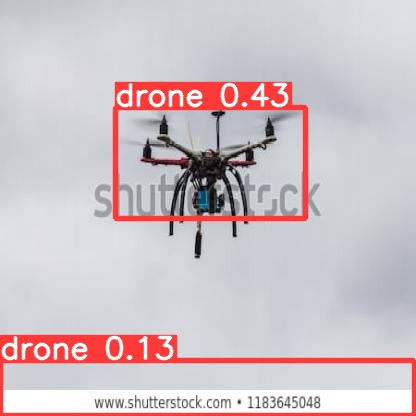

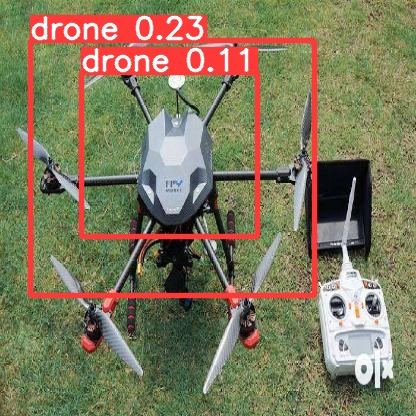

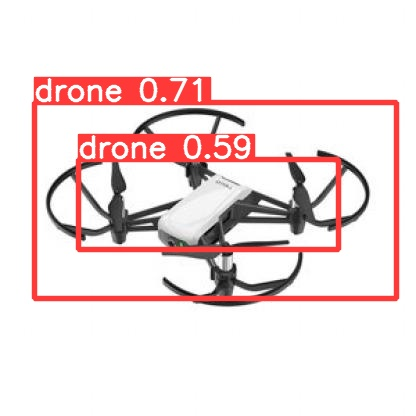

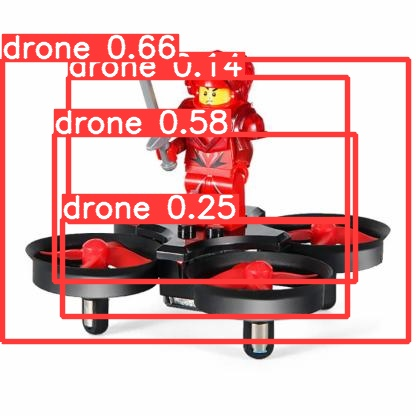

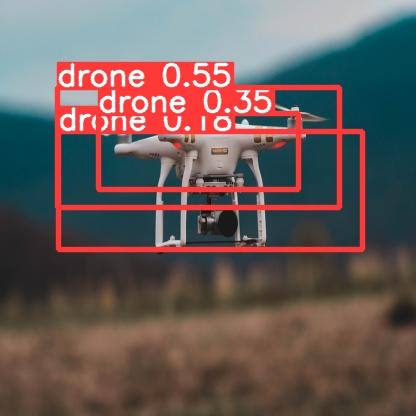

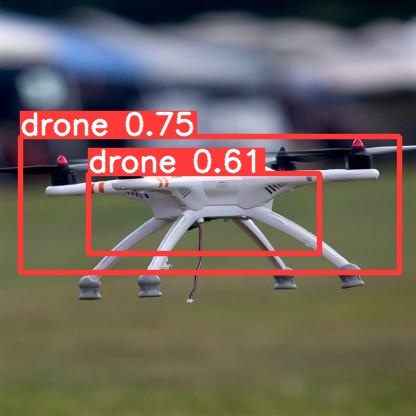

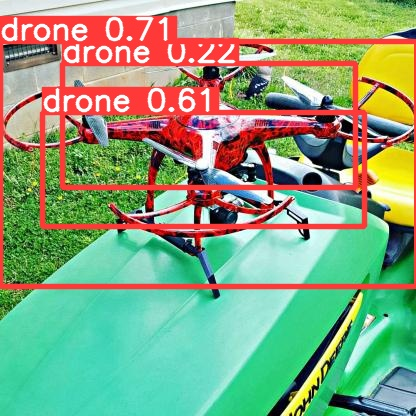

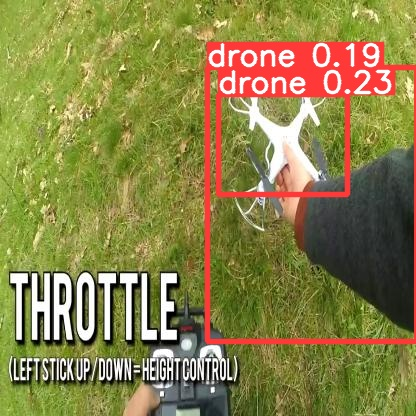

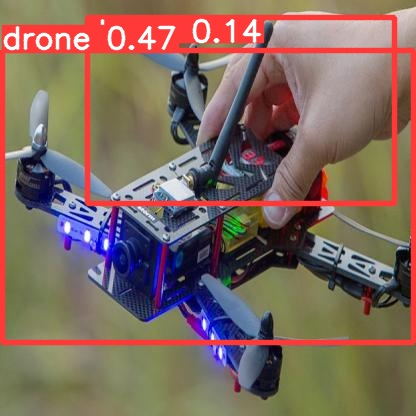

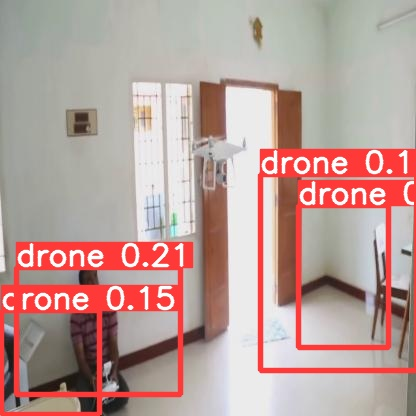

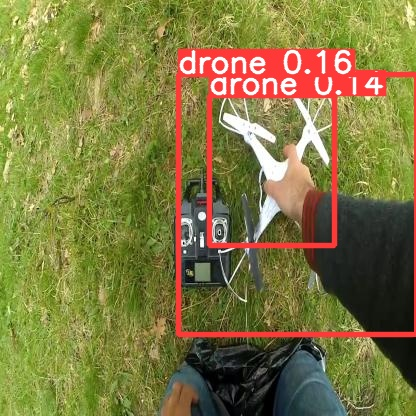

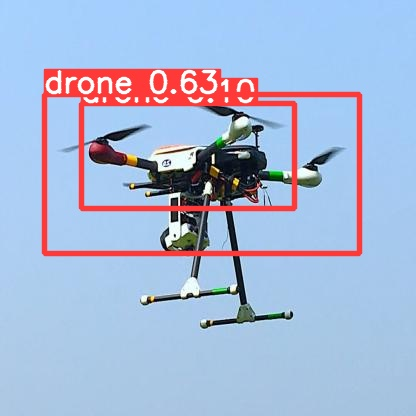

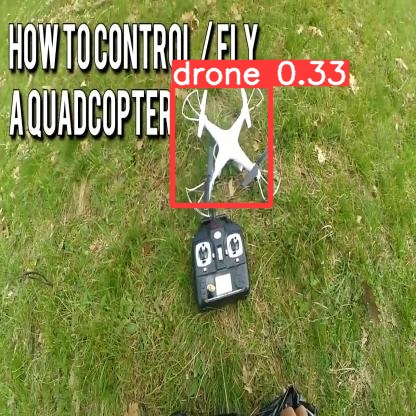

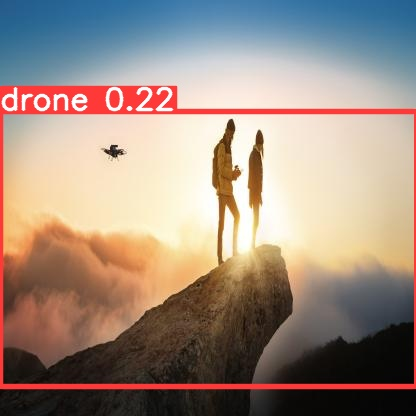

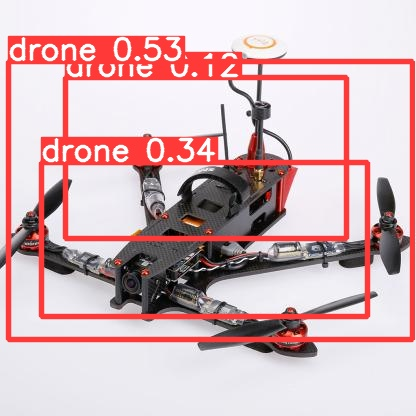

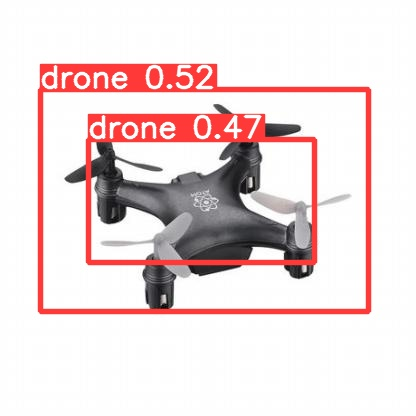

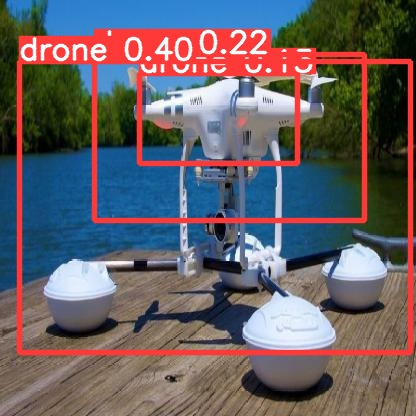

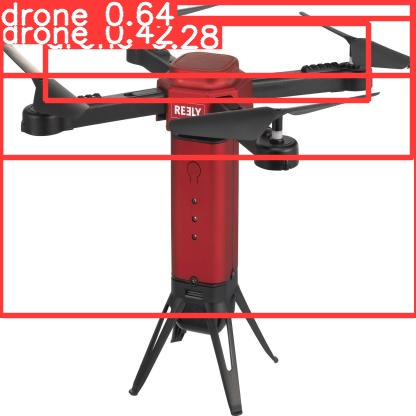

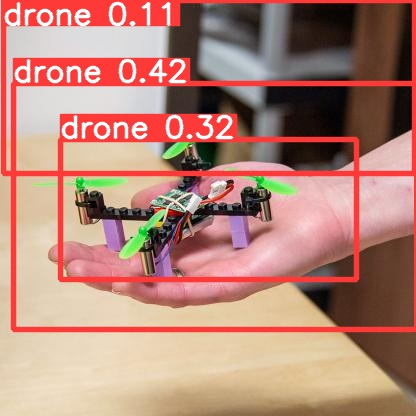

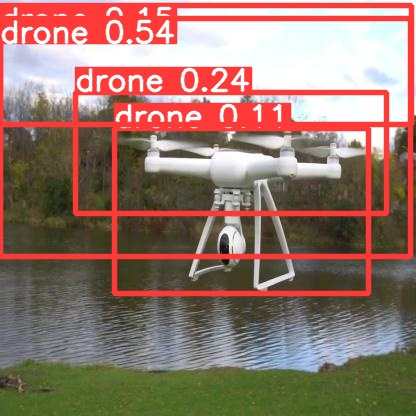

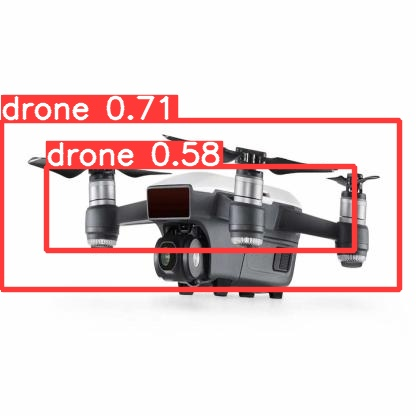

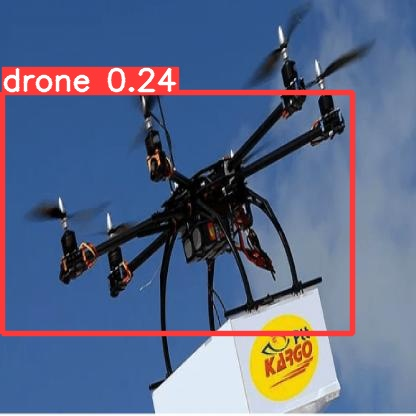

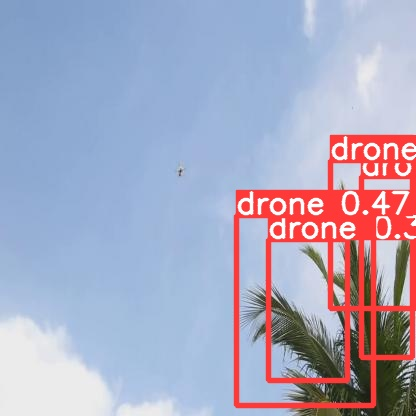

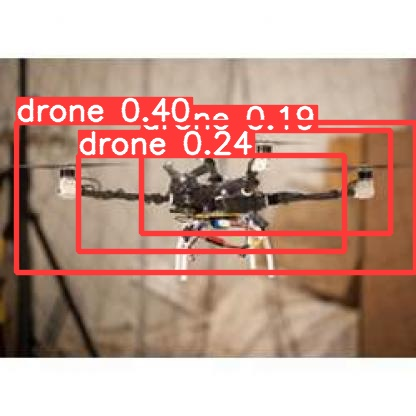

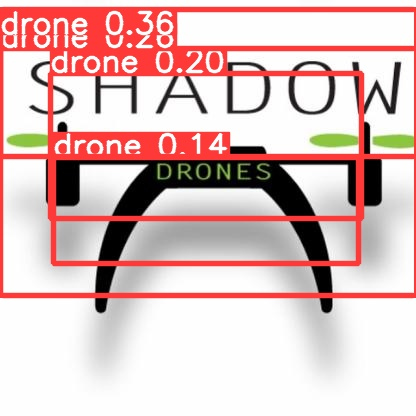

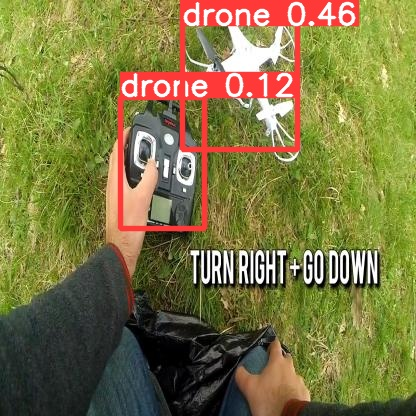

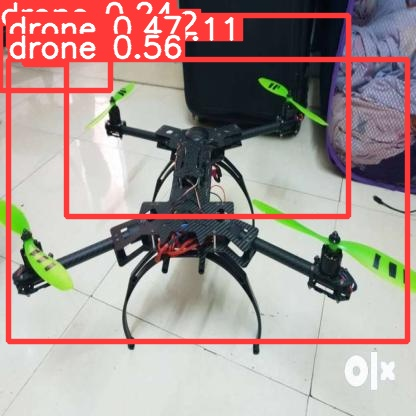

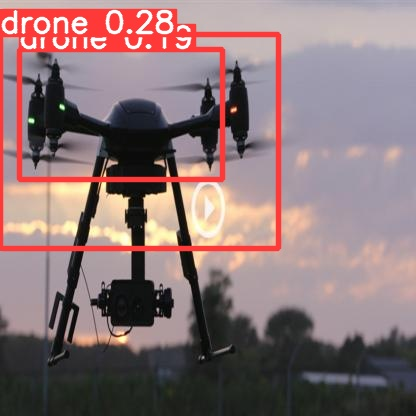

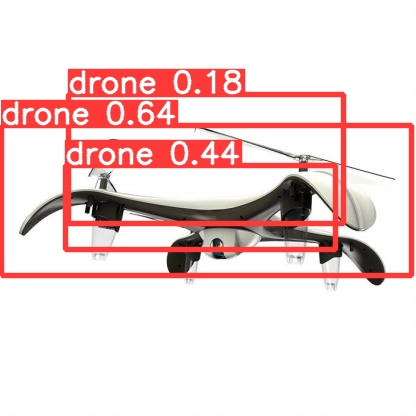

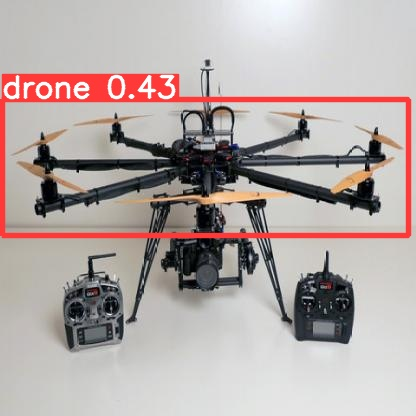

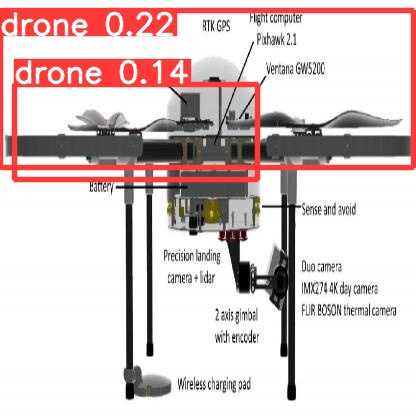

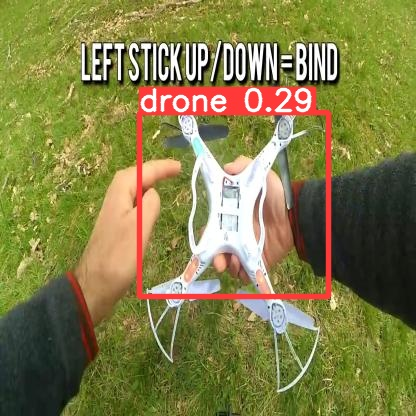

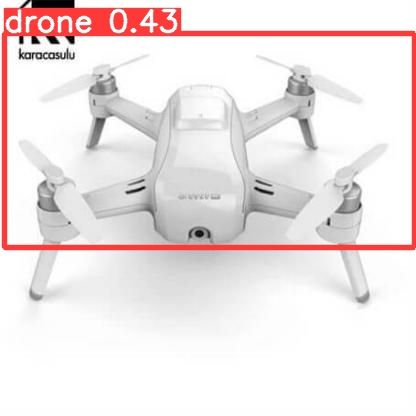

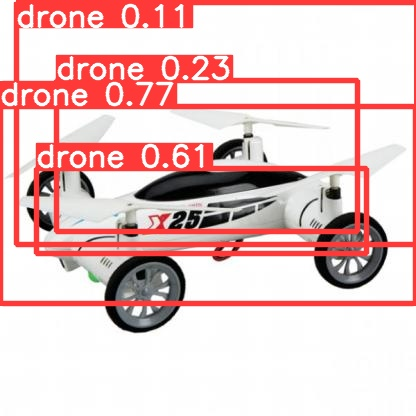

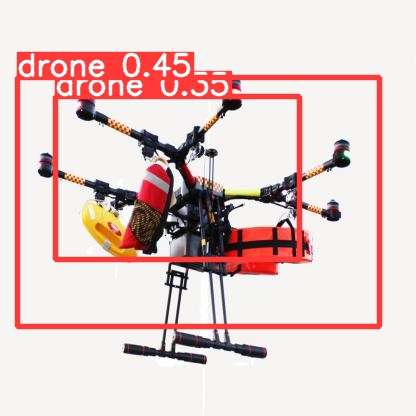

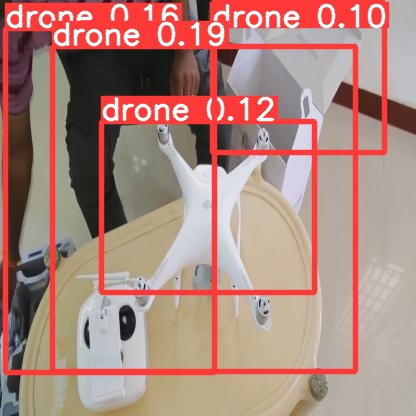

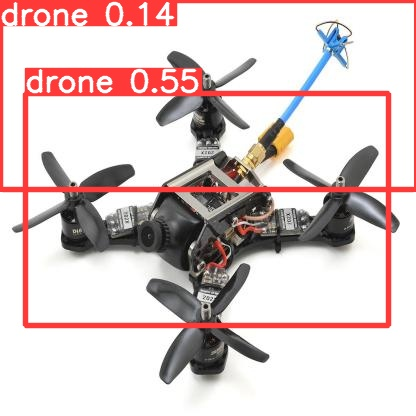

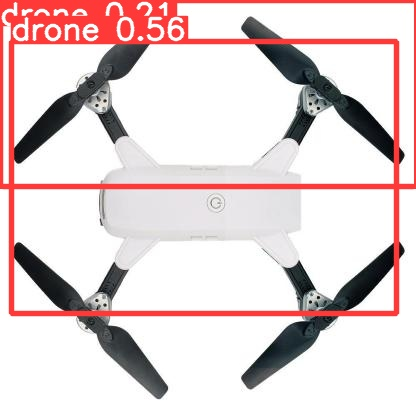

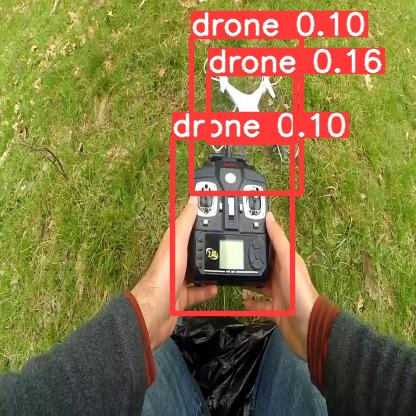

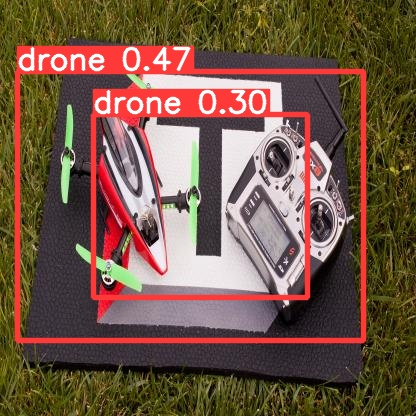

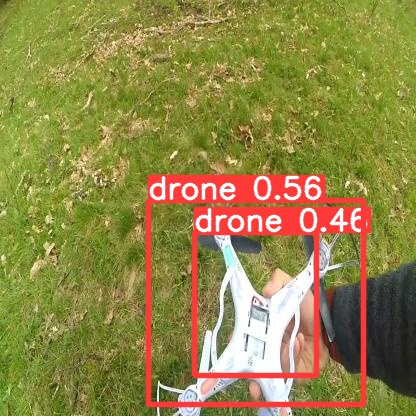

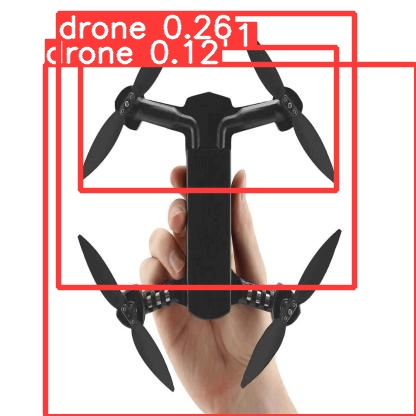

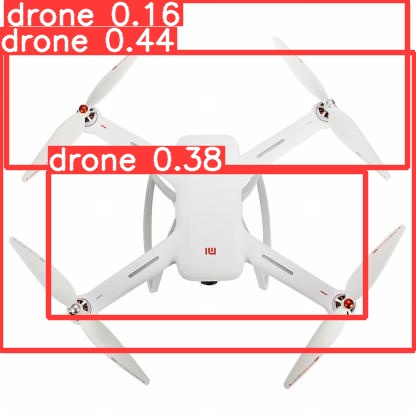

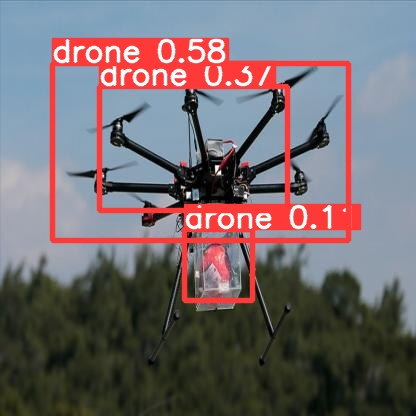

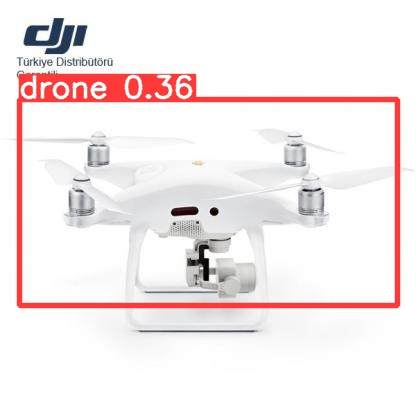

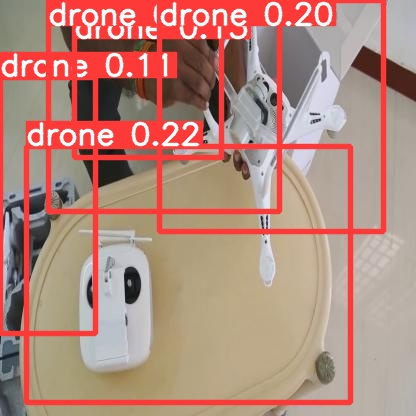

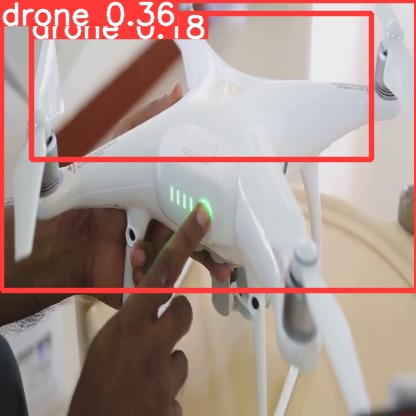

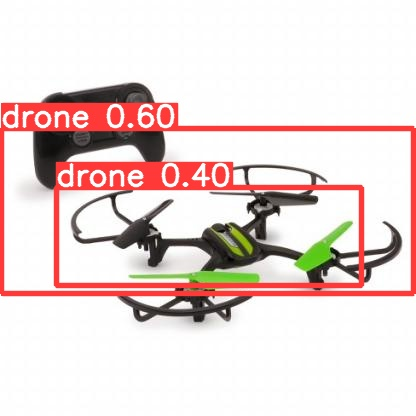

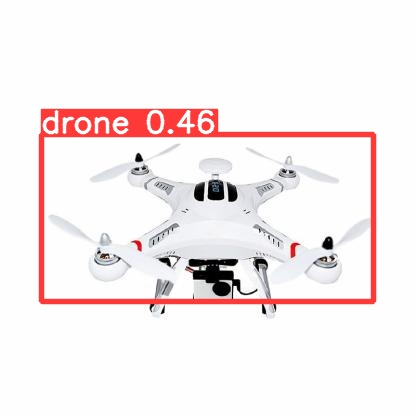

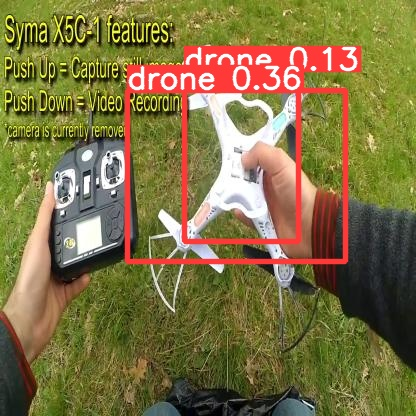

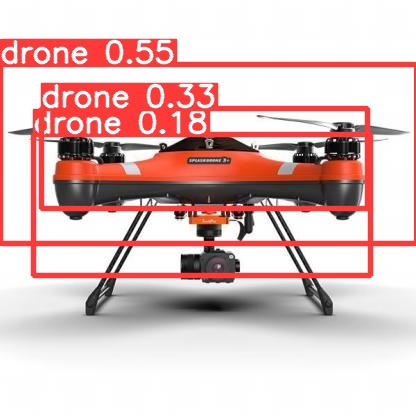

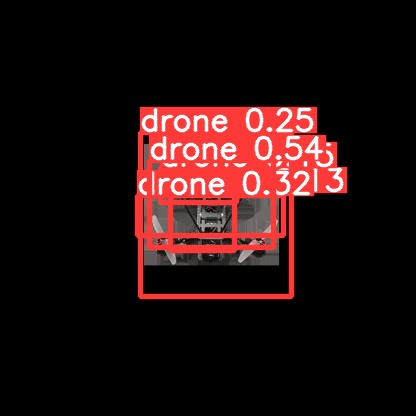

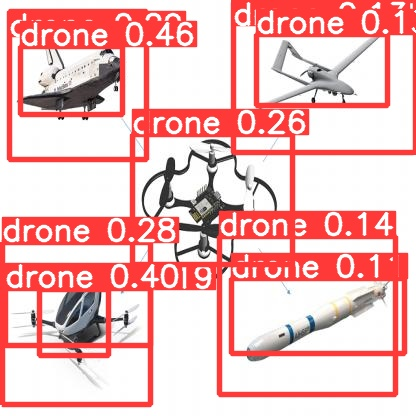

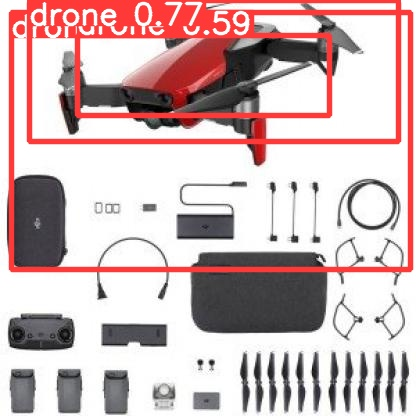

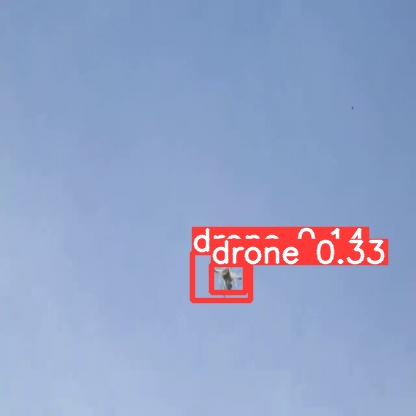

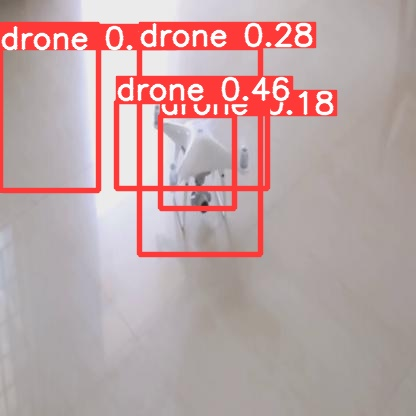

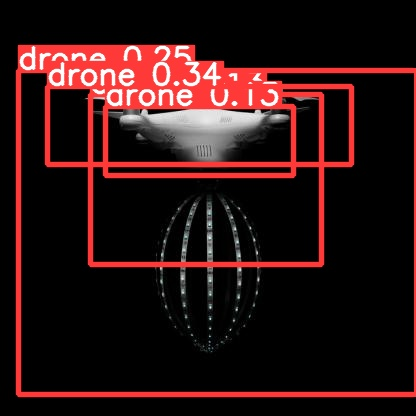

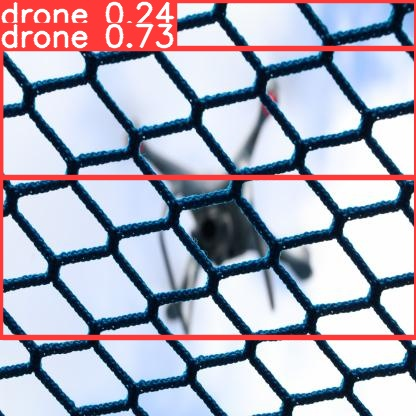

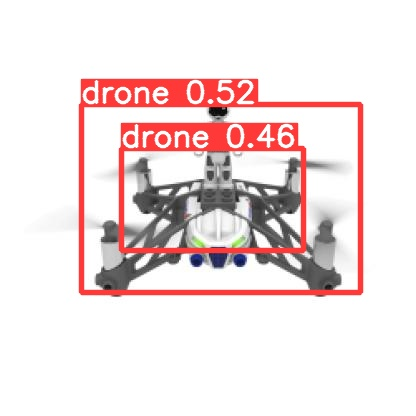

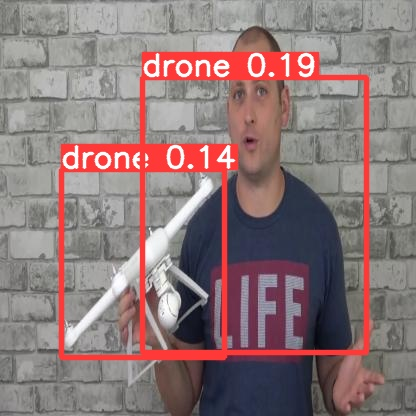

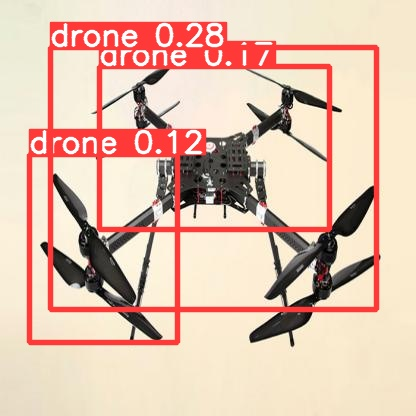

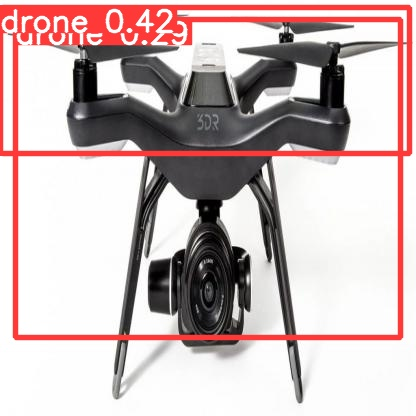

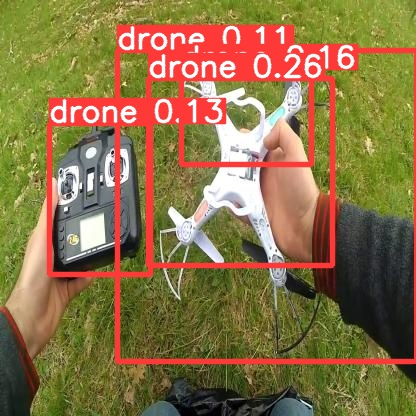

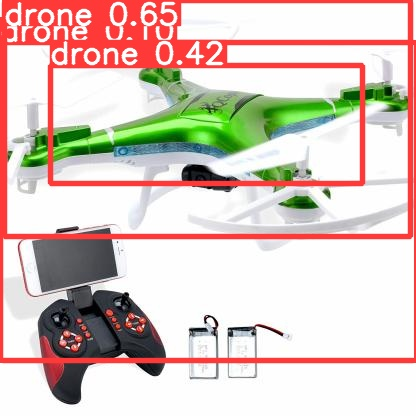

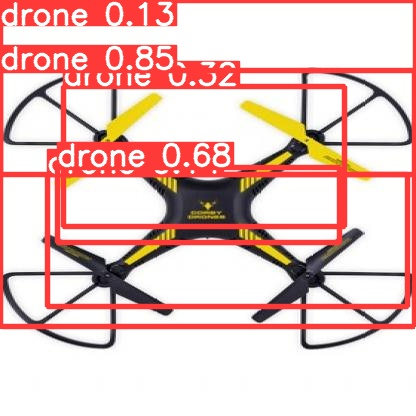

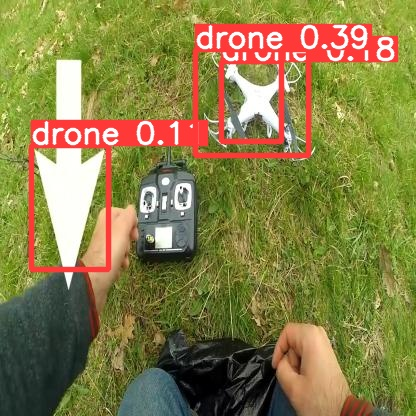

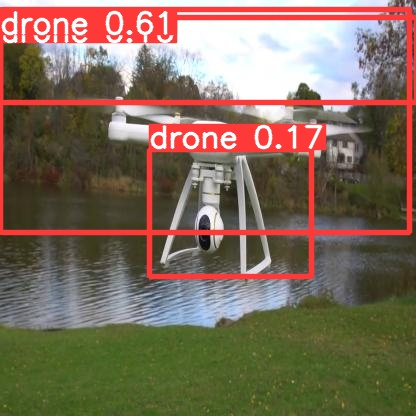

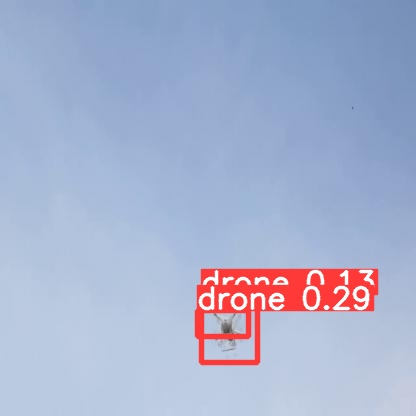

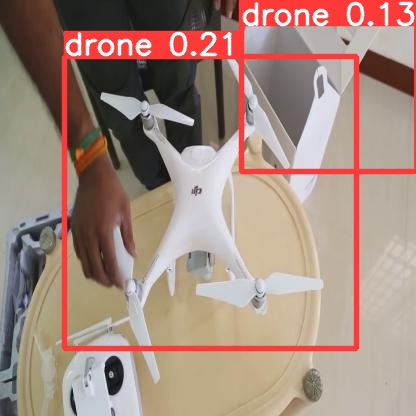

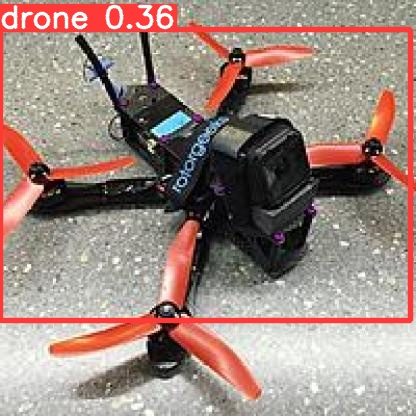

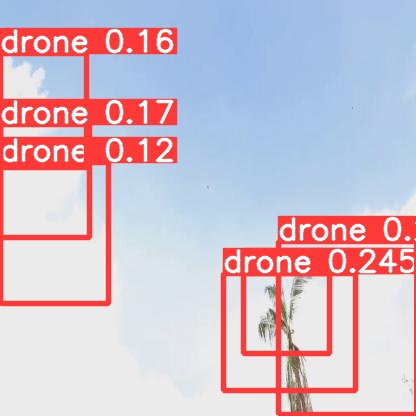

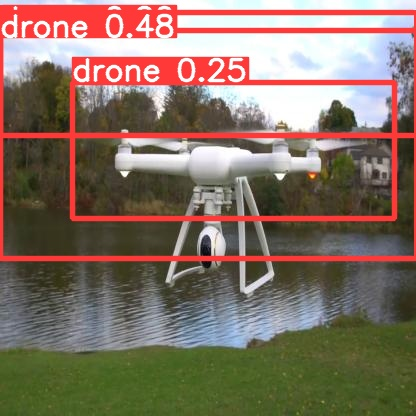

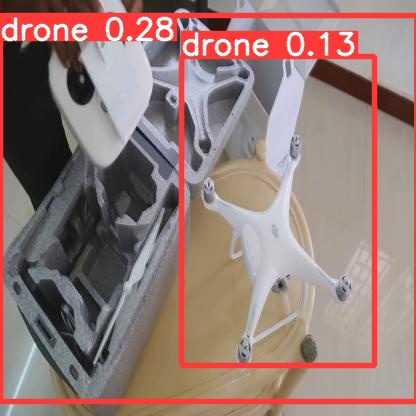

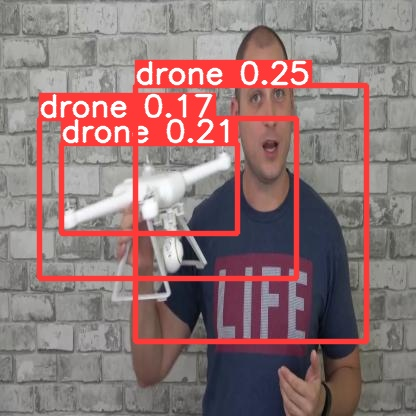

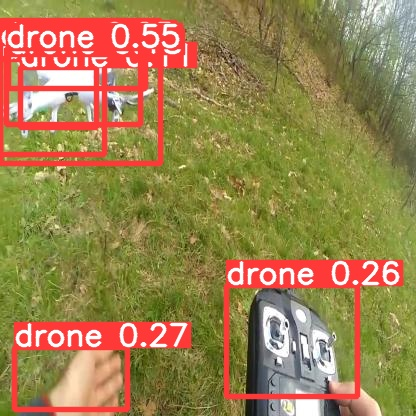

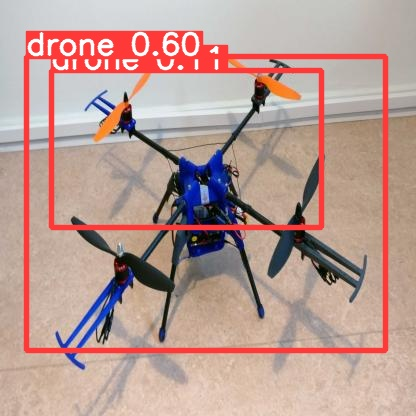

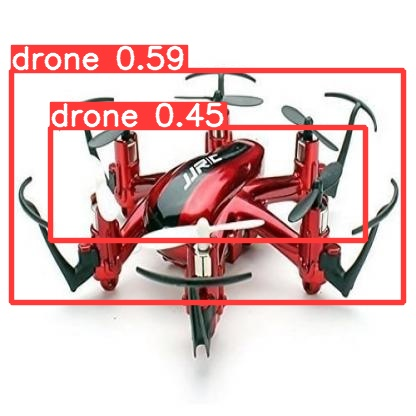

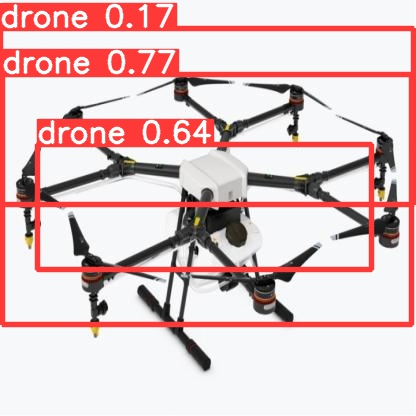

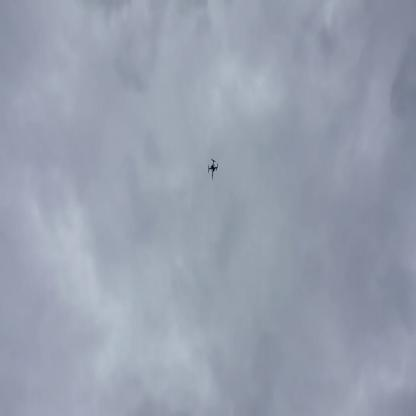

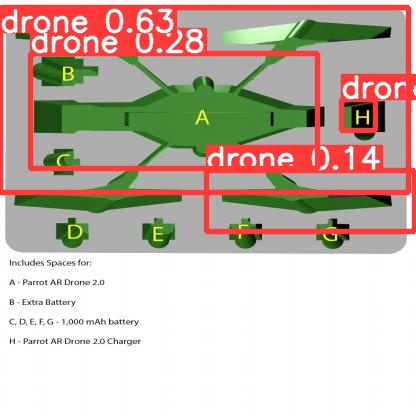

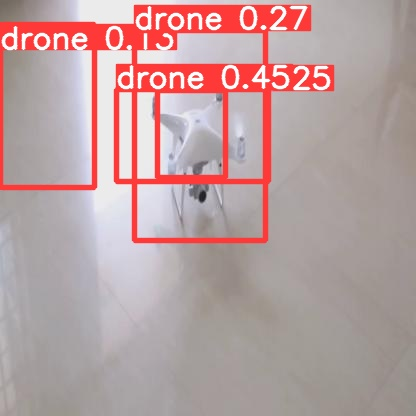

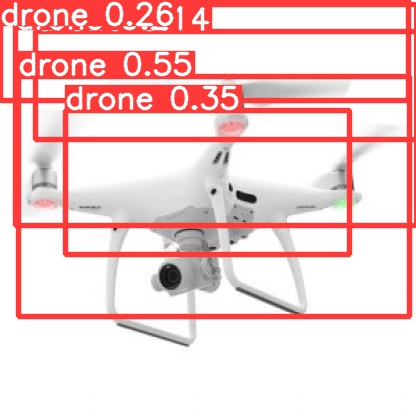

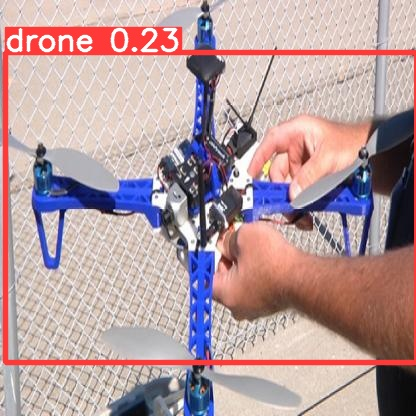

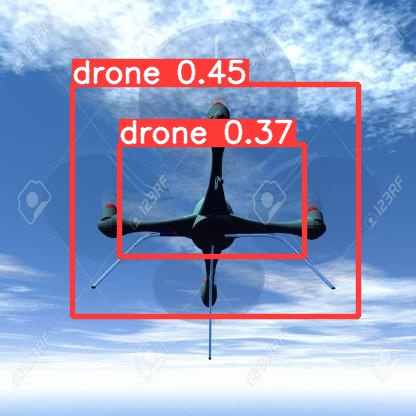

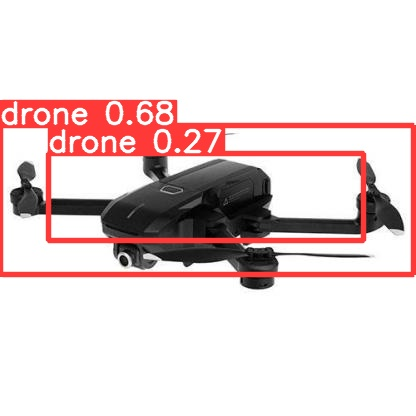

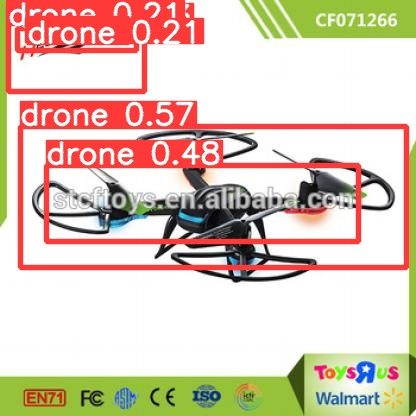

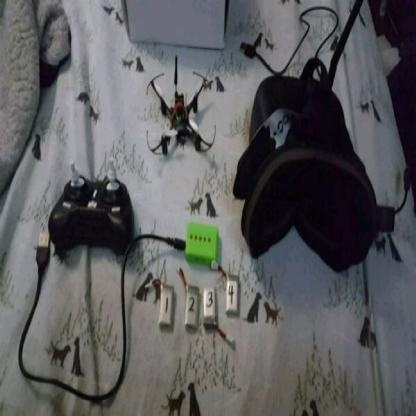

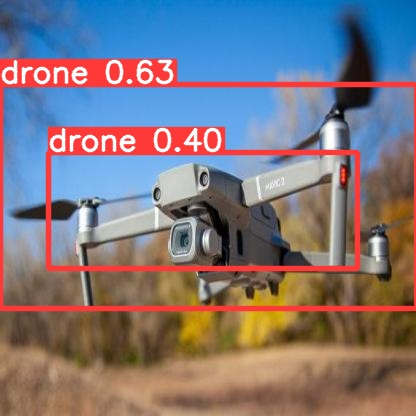

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('/content/yolov5')
# files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
!zip -r /content/yolov5.zip /content/yolov5

  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/train.py (deflated 69%)
  adding: content/yolov5/.ipynb_checkpoints/ (stored 0%)
  adding: content/yolov5/yolov5s.pt (deflated 9%)
  adding: content/yolov5/.gitattributes (deflated 4%)
  adding: content/yolov5/detect.py (deflated 68%)
  adding: content/yolov5/__pycache__/ (stored 0%)
  adding: content/yolov5/__pycache__/val.cpython-37.pyc (deflated 43%)
  adding: content/yolov5/__pycache__/export.cpython-37.pyc (deflated 52%)
  adding: content/yolov5/yolov5x.pt (deflated 8%)
  adding: content/yolov5/utils/ (stored 0%)
  adding: content/yolov5/utils/__pycache__/ (stored 0%)
  adding: content/yolov5/utils/__pycache__/downloads.cpython-37.pyc (deflated 42%)
  adding: content/yolov5/utils/__pycache__/autoanchor.cpython-37.pyc (deflated 42%)
  adding: content/yolov5/utils/__pycache__/__init__.cpython-37.pyc (deflated 28%)
  adding: content/yolov5/utils/__pycache__/torch_utils.cpython-37.pyc (deflated 43%)
  adding: content/yolov

In [24]:
files.download('/content/yolov5.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>